## Ejercicio 1

In [269]:
# importamos la libreria pandas y numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [270]:
# cargamos los datos
datos =pd.read_csv("autos - autos.csv",sep=";")

In [271]:
# vemos los datos
datos.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0


In [272]:
# creamos la función para modificar la columna pais de origen
def modificar(pais):
    # 1 sera USA
    # 2 sera Europe
    # 3 sera Japan
    if pais == "USA":
        pais=1
        return pais
    elif pais == "Europe":
        pais=2
        return pais
    else:
        pais = 3
        return pais

In [273]:
# aplicamos la función a la columna
datos["Pais_Origen"] = datos["Pais_Origen"].apply(modificar)

## Ejercicio 2

In [274]:
# eliminamos los valores faltantes en caso de existir
datos =  datos.dropna()

In [275]:
# al eliminar los datos faltantes se han modificados los indices así se los restableceremos
datos = datos.reset_index()

In [276]:
# eliminamos la columna indes
datos=datos.drop(['index'], axis=1)

In [277]:
# Las variables para este ejercicio sera
var1 = datos["Desplazamiento"]
var2 = datos["Caballo_De_Fuerza"]
# funcion para variable 3
def fun3(x,y):
    if x>y:
        return 5
    else:
        return 3
# generamos las 5 variables usando las que tenemos

datos["Variable_1"] = np.log10(var1/var2)
datos["Variable_2"] = (np.sqrt(var1)*np.exp(var2))/200
datos["Variable_3"] = datos[['Desplazamiento', 'Caballo_De_Fuerza']].apply(lambda x: fun3(*x), axis=1)
datos["Variable_4"] = (1/(np.log(var1/var2)))*100
datos["Variable_5"] = (var2**2)/var1

In [278]:
# creamos la función para las variables cualitativas
# usaremos la variable 4
def calitativas(x):
    if x > datos["Variable_5"].mean() + datos["Variable_5"].std():
        return "Alto"
    elif x > datos["Variable_5"].mean() - datos["Variable_5"].std() and x < datos["Variable_5"].mean() + datos["Variable_5"].std():
        return "Medio"
    elif x < datos["Variable_5"].mean() - datos["Variable_5"].std():
        return "Bajo"

In [280]:
def graficas(variable,x):
    fig = plt.figure(figsize =(10, 7)) 
    plt.boxplot(variable) 
    plt.grid()
    plt.title("Grafica de caja y bigotes:"+x,fontsize=16)
    ax = plt.gca()
    ax.set_facecolor('gray')
    
    fig = plt.figure(figsize =(10, 7)) 
    plt.hist(variable) 
    plt.grid()
    plt.title("Histograma:"+x,fontsize=16)
    ax = plt.gca()
    ax.set_facecolor('gray')
    
    fig = plt.figure(figsize =(10, 7)) 
    plt.plot(variable,color="red") 
    plt.grid()
    plt.title("Grafica de sierra:"+x,fontsize=16)
    ax = plt.gca()
    ax.set_facecolor('gray')

In [281]:
# aplicamos la funcion a variables numericas
# eliminamos las que no son numericas
datos=datos.drop(['Nombre'], axis=1)
datos=datos.drop(['Anyo'], axis=1)
c = datos.columns.values

<ipython-input-280-b2df0e92b731>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize =(10, 7))


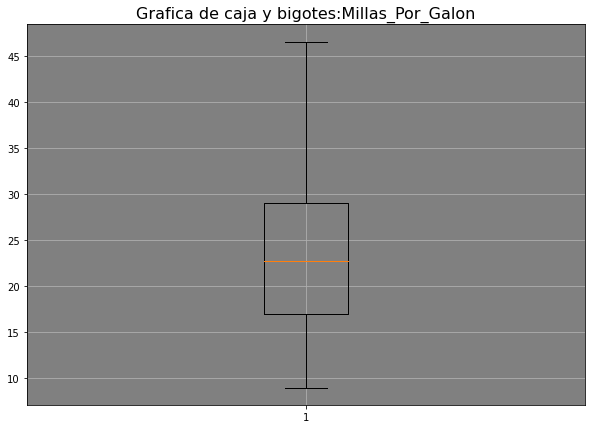

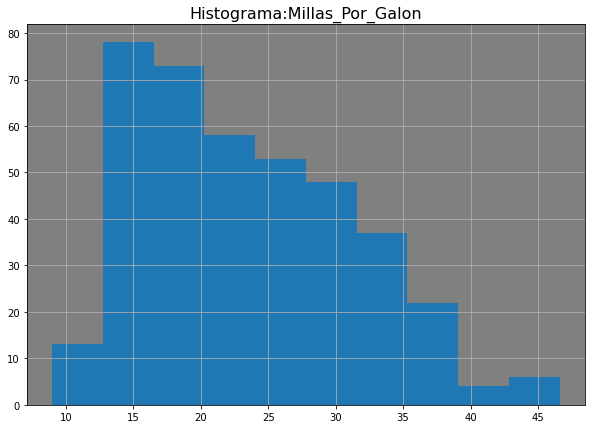

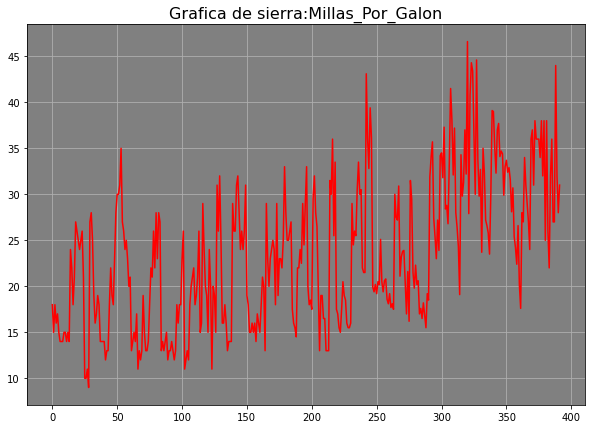

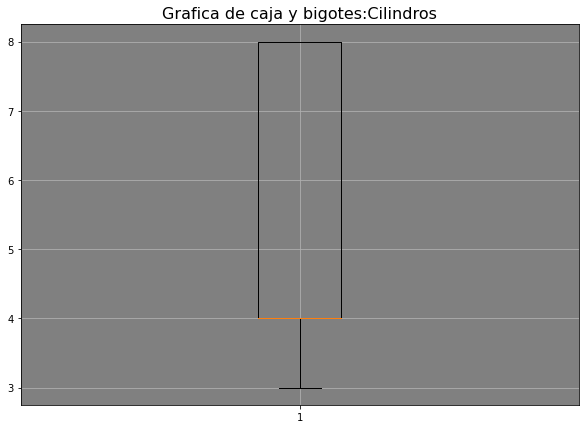

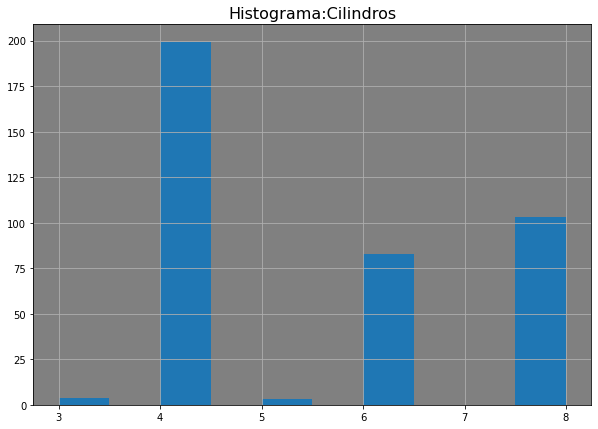

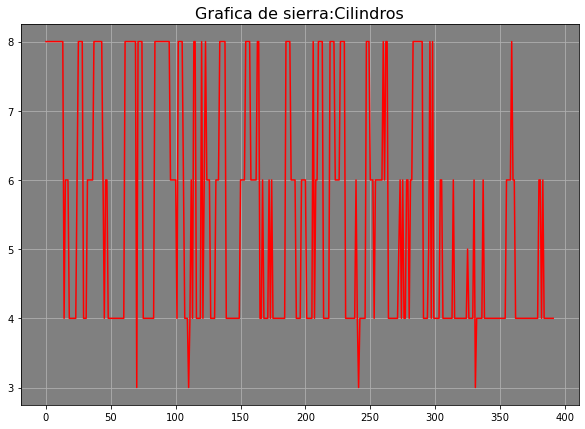

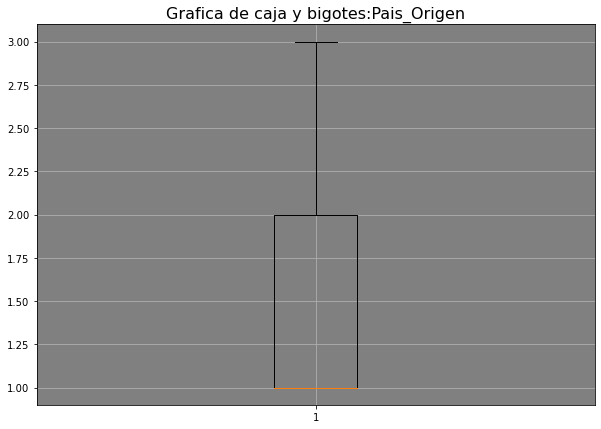

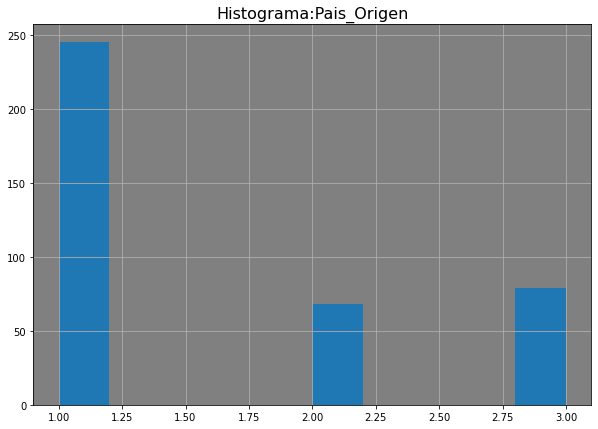

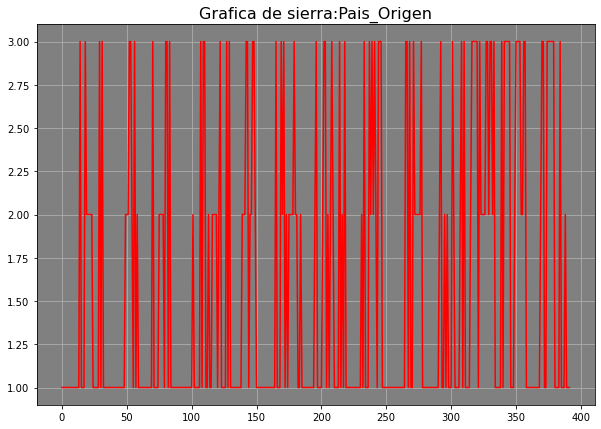

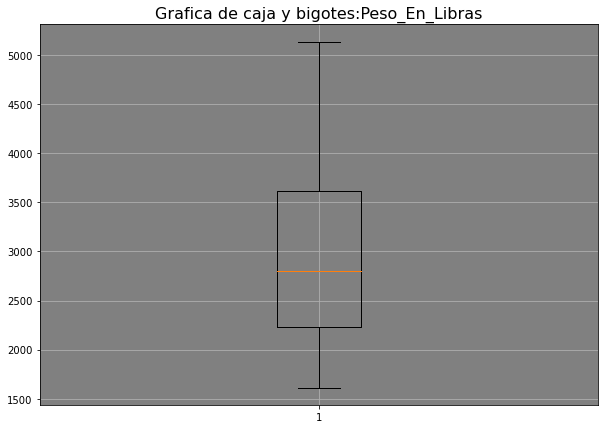

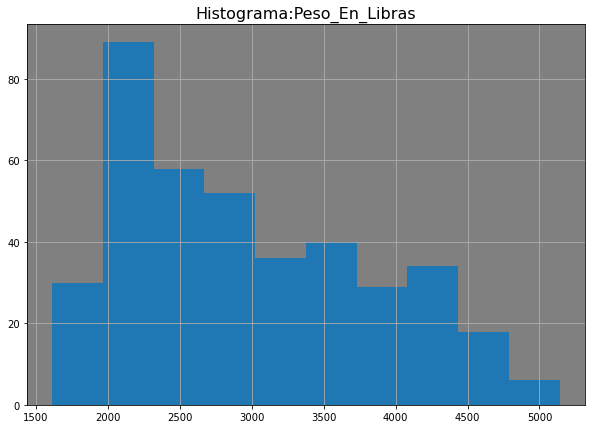

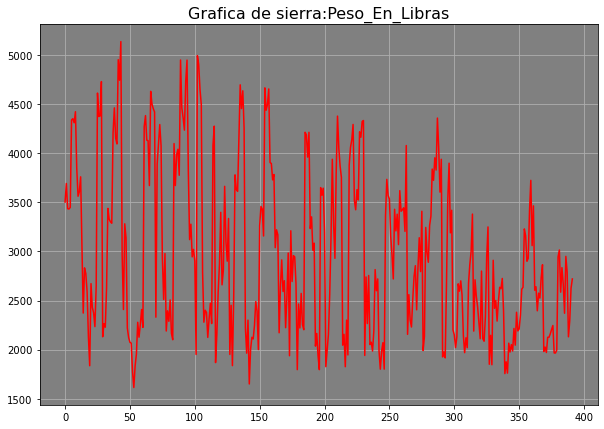

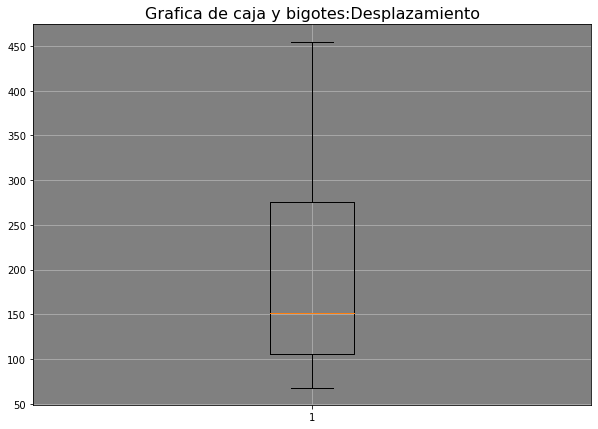

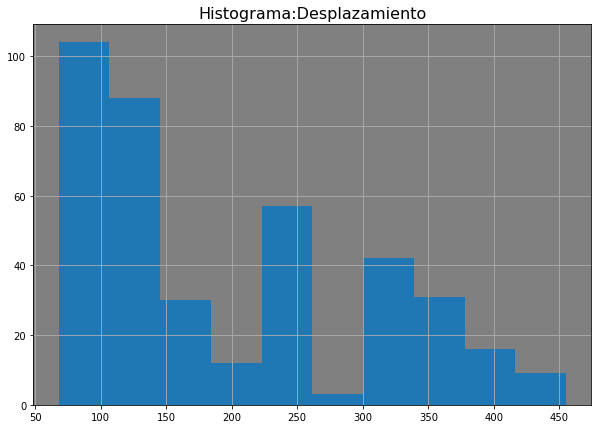

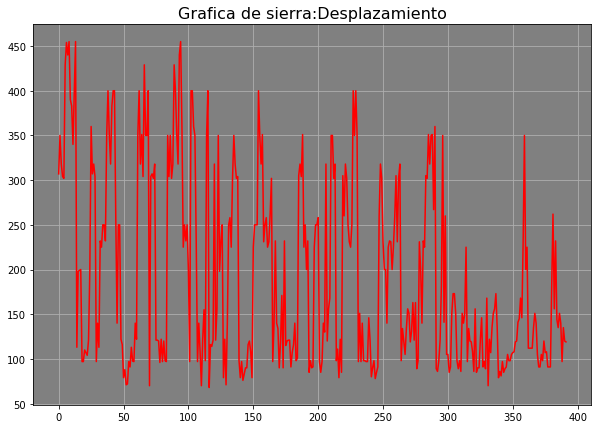

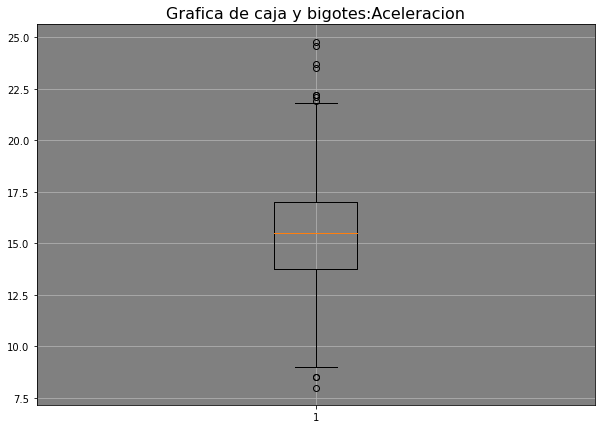

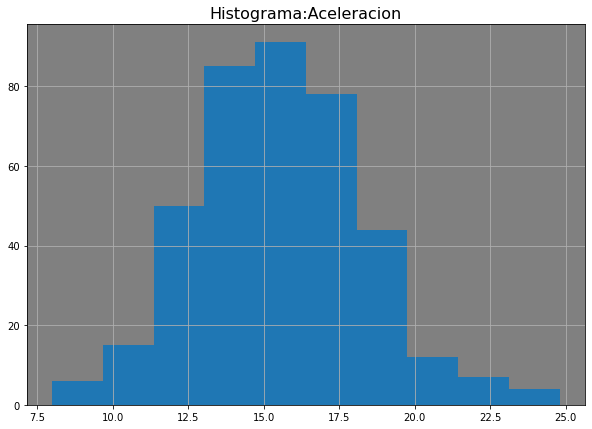

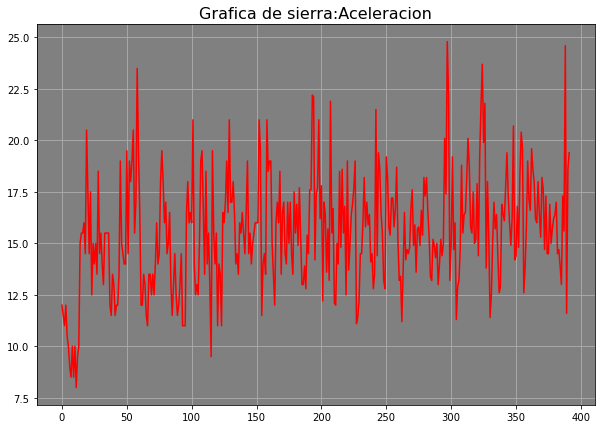

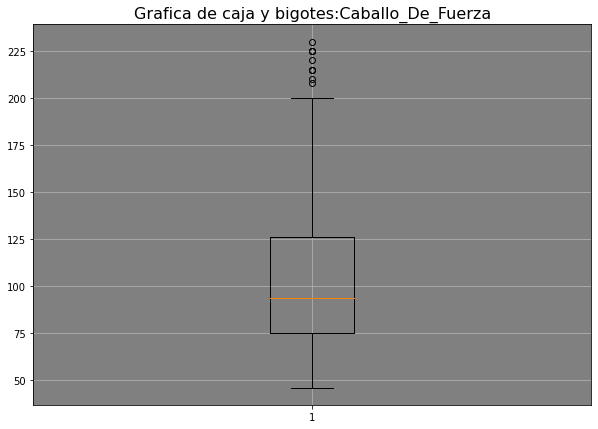

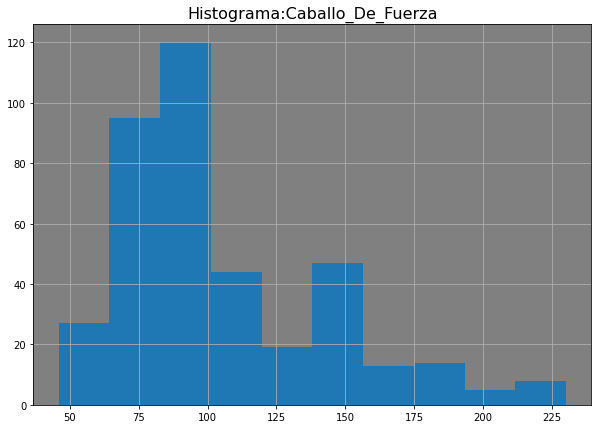

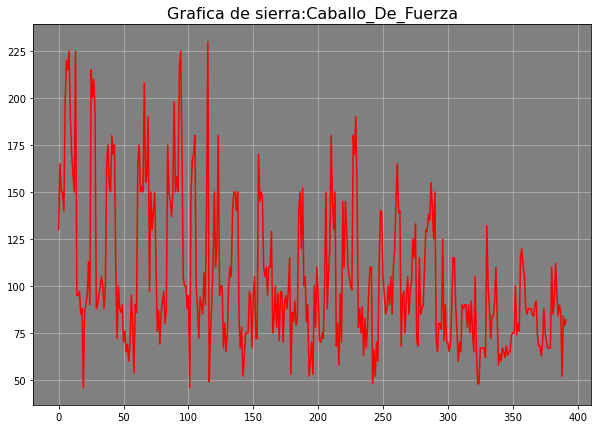

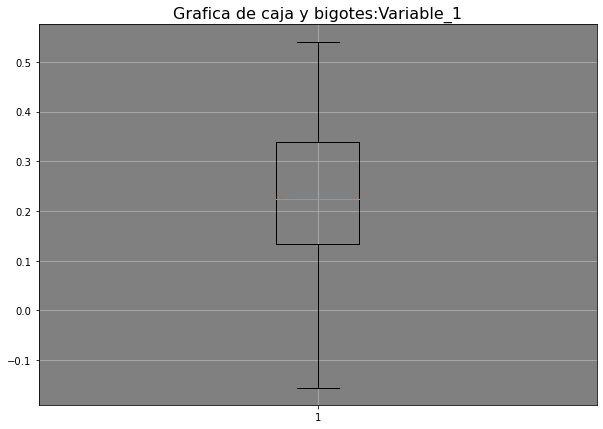

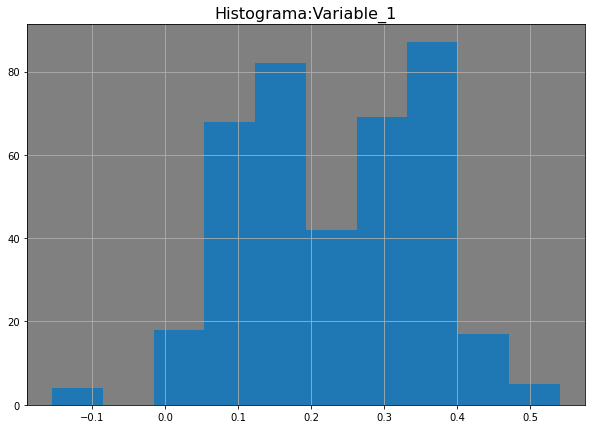

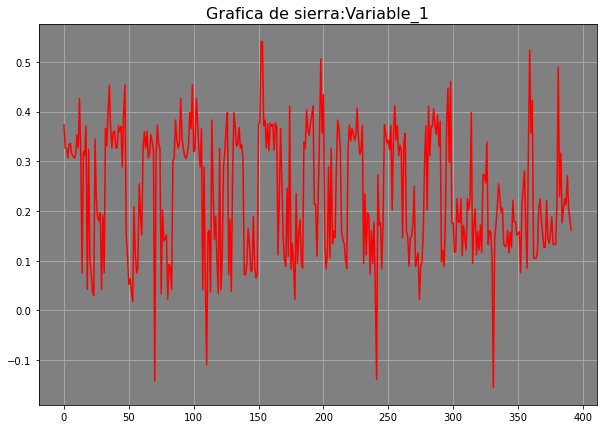

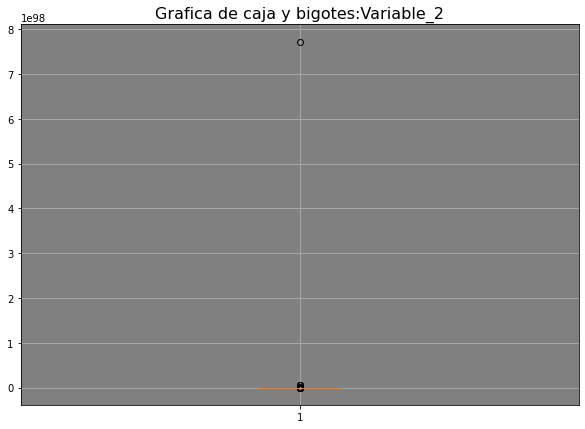

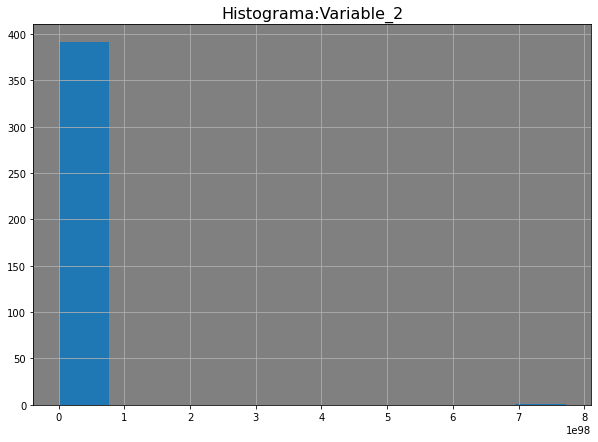

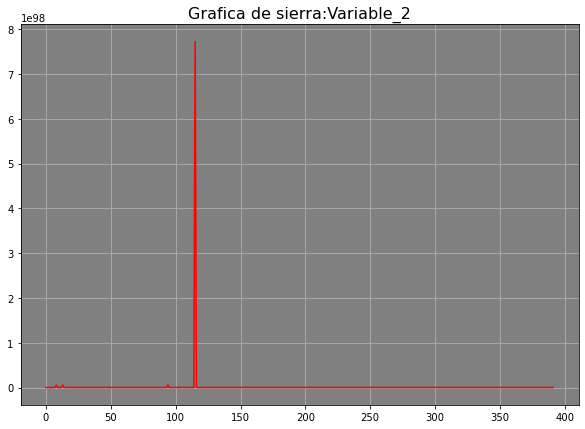

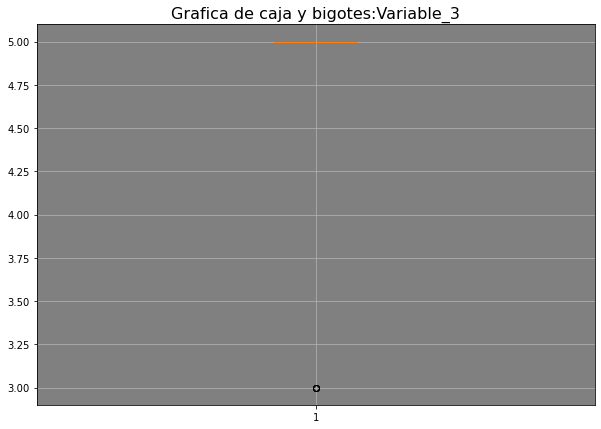

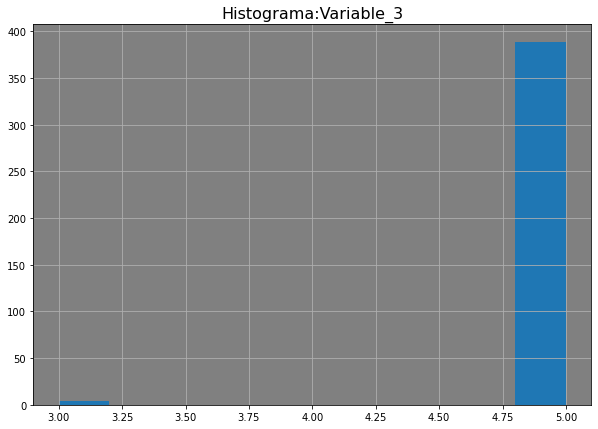

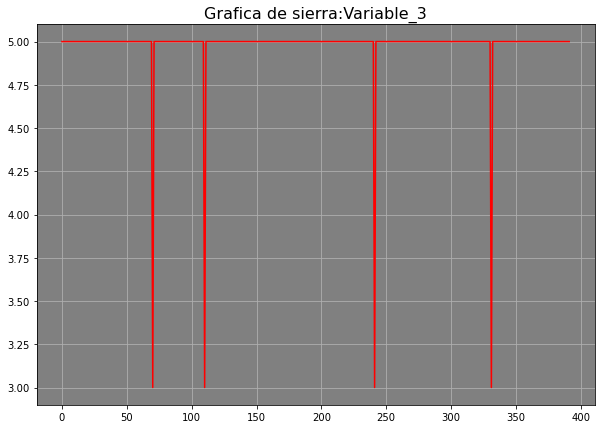

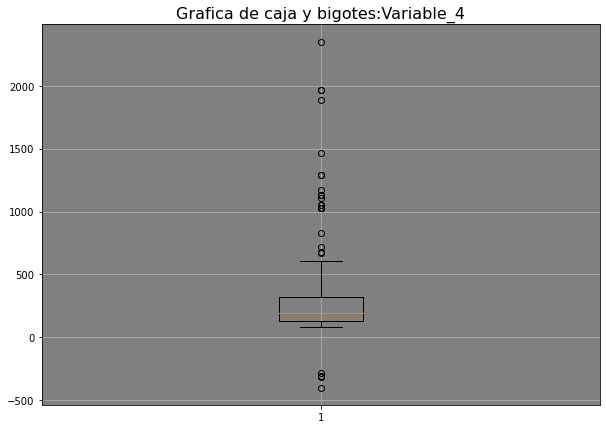

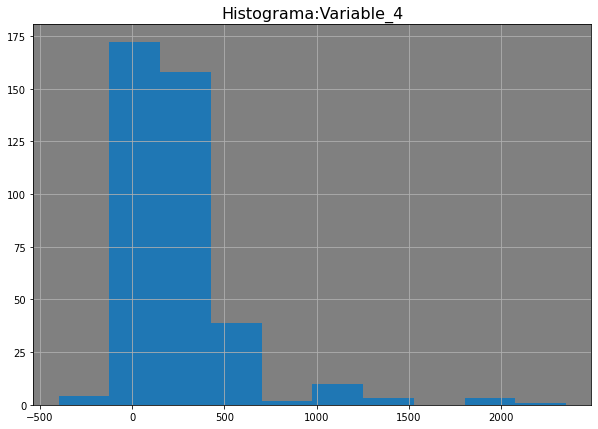

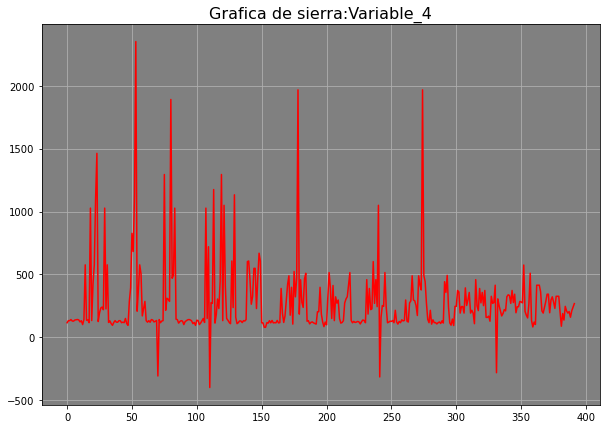

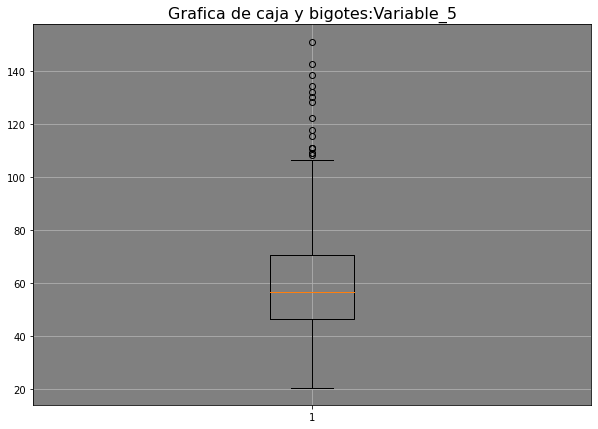

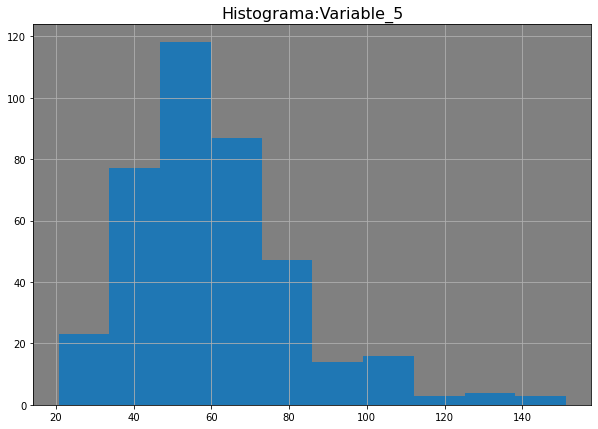

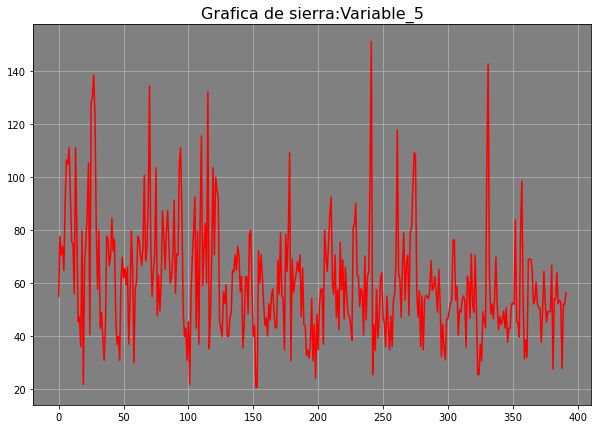

In [282]:
for i in c:
    graficas(datos[i],i)

In [291]:
# creamos el mapa de calor
def mapa(df):
    corr = df.corr() 
    corr.style.background_gradient(cmap ='hot')
    return corr.style.background_gradient(cmap ='hot')

In [292]:
mapa(datos)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5
Millas_Por_Galon,1.000000,-0.777618,0.565209,-0.832244,-0.805127,0.423329,-0.778427,-0.558737,-0.049723,0.037721,0.301250,-0.364924
Cilindros,-0.777618,1.000000,-0.568932,0.897527,0.950823,-0.504683,0.842983,0.739999,0.076666,0.147327,-0.406002,0.220915
Pais_Origen,0.565209,-0.568932,1.000000,-0.585005,-0.614535,0.212746,-0.455171,-0.667549,-0.037024,-0.179656,0.422494,0.083973
Peso_En_Libras,-0.832244,0.897527,-0.585005,1.000000,0.932994,-0.416839,0.864538,0.688100,0.079038,0.069310,-0.402737,0.309143
Desplazamiento,-0.805127,0.950823,-0.614535,0.932994,1.000000,-0.543800,0.897257,0.756218,0.102206,0.118441,-0.430661,0.260839
Aceleracion,0.423329,-0.504683,0.212746,-0.416839,-0.543800,1.000000,-0.689196,-0.087032,-0.112948,0.084436,0.093412,-0.577151
Caballo_De_Fuerza,-0.778427,0.842983,-0.455171,0.864538,0.897257,-0.689196,1.000000,0.412823,0.168563,0.013786,-0.226710,0.643524
Variable_1,-0.558737,0.739999,-0.667549,0.688100,0.756218,-0.087032,0.412823,1.000000,0.002991,0.301758,-0.593025,-0.395414
Variable_2,-0.049723,0.076666,-0.037024,0.079038,0.102206,-0.112948,0.168563,0.002991,0.000000,0.005246,-0.017250,0.171047
Variable_3,0.037721,0.147327,-0.179656,0.069310,0.118441,0.084436,0.013786,0.301758,0.005246,1.000000,0.213605,-0.356273
